<a href="https://colab.research.google.com/github/pathilink/capim_case/blob/main/notebook/capim_case_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#BEE41D'>Capim - Data Analyst Case [EDA] </font>

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import plotly.graph_objects as go



## Data

In [2]:
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
date_cols = ['CLINIC_CREATED_AT', 'TRIAL_START_DATE', 'TRIAL_END_DATE',
             'REQUEST_FINISHED_AT',
             'ACCREDITATION_REQUESTED_AT', 'ACCREDITATION_APPROVED_AT',
             'ACCREDITATION_REJECTED_AT',
             'SUBSCRIPTION_START_DATE', 'SUBSCRIPTION_END_DATE',
             'SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT', 'SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT',
             'MOST_RECENT_INVOICE_CREATED_AT',
             'ACTIVITY_AT']

df = pd.read_csv('/content/drive/MyDrive/test/capim/data/data_model_capim.csv', parse_dates=date_cols)
df.sample(5)

,CLINIC_ID,CLINIC_CREATED_AT,BUSINESS_SEGMENTATION,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_REASONS,INTEREST_CATEGORY_SIGNUP,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,TRIAL_DURATION,TRIAL_START_DATE,TRIAL_END_DATE,TRIAL_START_HOUR,TRIAL_START_HOUR_CATEGORY,TRIAL_START_DAY_OF_WEEK,TRIAL_START_DAY_OF_WEEK_CATEGORY,HAS_USER_CREATED,MARKETING_ATTRIBUITION,MARKETING_ATTRIBUITION_CHANNEL_GROUP,MARKETING_ATTRIBUITION_CAMPAIGN,MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT,MARKETING_ATTRIBUITION_AD_GROUP,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS,REQUEST_FINISHED_AT,ACCREDITATION_REQUESTED_AT,ACCREDITATION_APPROVED_AT,ACCREDITATION_REJECTED_AT,REASON_1,REASON_2,REASON_3,REASON_4,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT,FIRST_PAYMENT_PROMOTION_CODE,FIRST_PAYMENT_COUPON_ID,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,ANALYTICS_DOMAIN,IS_TRANSACTION,IS_BNPL_ACTIVITY,IS_VALID_ACTIVITY,IS_DELETION_ACTIVITY,IS_MANAGEMENT_ACTIVITY,IS_FINANCE_ACTIVITY
10488,10746,2023-09-16 15:32:40.850,Independente,False,Inbound,"['bnpl', 'calendar', 'patients_management', 'f...",BNPL e SaaS,True,False,True,7,2023-09-16,2023-09-23,15,After Hours,6,Weekend,True,Other,Other,NaN,NaN,NaN,False,False,False,False,False,NaN,NaT,NaT,NaT,NaT,bnpl,calendar,patients_management,finance_management,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-16 15:34:55.543,new_user_created,user_management,setup,setup,False,False,True,False,True,False
10666,10782,2023-09-18 09:01:41.391,Independente,False,Inbound,"['bnpl', 'calendar', 'patients_management', 'f...",BNPL e SaaS,True,False,True,7,2023-09-18,2023-09-25,9,Business Hours,1,Weekday,True,Paid - google,Paid - google,google_search_branding_signup,Branding,NaN,True,False,False,False,False,NaN,NaT,NaT,NaT,NaT,bnpl,calendar,patients_management,finance_management,NaN,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-18 09:14:30.267,budget_created,budget_management,patient,patient,False,False,True,False,True,False
2363,9565,2023-08-14 13:57:52.506,Independente,False,Inbound,"['patients_management', 'finance_management', ...",BNPL e SaaS,True,False,True,7,2023-08-14,2023-08-21,13,Business Hours,1,Weekday,True,Organic - search,Organic,NaN,NaN,NaN,False,False,True,False,False,Incompleta,NaT,NaT,NaT,NaT,patients_management,finance_management,calendar,bnpl,sub_1NhXxMCpjOdJI4gTBTMoNlzE,2023-08-21,2023-10-21,2023-09-21 10:15:44,2023-10-21 10:15:44,2023-09-21 10:18:37,2023-09-21 11:28:38.000,complete,active,1.0,Cartão de Crédito,visa,89.90,NaN,NaN,2023-08-16 16:44:09.372,patient_created,patient_management,patient,patient,False,False,False,False,True,False
2890,9572,2023-08-14 16:37:48.977,Independente,False,Inbound,"['calendar', 'patients_management', 'finance_m...",BNPL e SaaS,True,False,True,7,2023-08-14,2023-08-19,16,Business Hours,1,Weekday,True,Paid - meta,Paid - meta,meta_signup_agenda,SaaS,interesses-validados,True,True,False,False,True,Reprovado,2023-08-16 11:39:26.451,2023-08-16 11:39:26.457,NaT,2023-08-16 11:44:59.801,calendar,patients_management,finance_management,bnpl,sub_1NgvJpCpjOdJI4gTvoBOooWr,2023-08-19,2023-09-25,2023-09-19 17:00:21,2023-10-19 17:00:21,2023-09-19 17:02:44,2023-08-19 17:00:23.000,complete,canceled,1.0,Cartão de Crédito,visa,89.90,NaN,NaN,2023-08-16 11:52:26.917,patient_created,patient_management,patient,patient,False,False,False,False,True,False
1058,9175,2023-08-04 08:20:10.843,Independente,False,Inbound,"['patients_management', 'calendar', 'bnpl', 'f...",BNPL e SaaS,True,False,True,7,2023-08-04,2023-08-07,8,After Hours,5,Weekday,True,Other,Other,NaN,NaN,NaN,False,F

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13516 entries, 0 to 13515
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   CLINIC_ID                                   13516 non-null  int64         
 1   CLINIC_CREATED_AT                           13516 non-null  datetime64[ns]
 2   BUSINESS_SEGMENTATION                       13516 non-null  object        
 3   IS_CHAIN_CLINIC                             13516 non-null  bool          
 4   FIRST_USER_HUBSPOT_SOURCE                   13516 non-null  object        
 5   INTEREST_REASONS                            13516 non-null  object        
 6   INTEREST_CATEGORY_SIGNUP                    13516 non-null  object        
 7   HAS_INTEREST_BNPL                           13516 non-null  bool          
 8   HAS_INTEREST_BNPL_ONLY                      13516 non-null  bool          
 9   HAS_IN

In [5]:
df['BUSINESS_SEGMENTATION'].unique()

array(['Independente', 'Independente - Legado'], dtype=object)

In [6]:
df['IS_CHAIN_CLINIC'].unique()

array([False])

In [7]:
df['FIRST_USER_HUBSPOT_SOURCE'].unique()

array(['Inbound', 'Redes', 'no_user', 'Outbound', 'Eventos'], dtype=object)

In [8]:
df['INTEREST_CATEGORY_SIGNUP'].unique()

array(['BNPL e SaaS', 'Apenas BNPL', 'Apenas SaaS', 'Desconhecido'],
      dtype=object)

In [9]:
# drop columns
df = df.drop(columns=['BUSINESS_SEGMENTATION', 'IS_CHAIN_CLINIC'])

## Functions

In [10]:
def hist_graph(dataset, x, title, label_x, label_y):
  sns.histplot(dataset[x], bins=10, kde=False, color='#BEE41D')

  plt.title(title)
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.show()

## Metrics

🎯 The focus of this case will be to understand the trial period and how it can be improved.

### Trial

In [11]:
df['TRIAL_DURATION'].describe()

,TRIAL_DURATION
count,13516.000000
mean,9.464782
std,24.050933
min,0.000000
25%,7.000000
50%,7.000000
75%,7.000000
max,365.000000


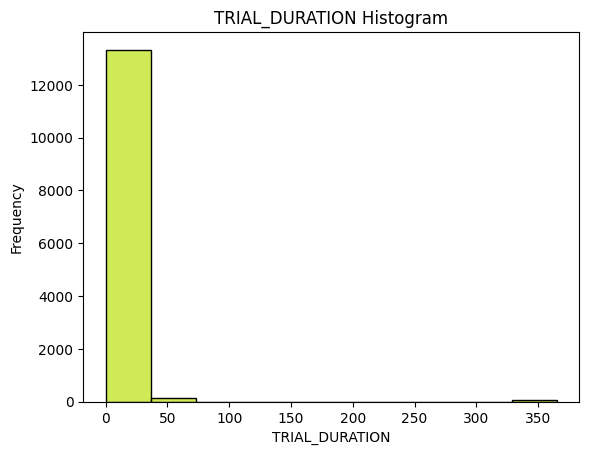

In [12]:
hist_graph(
    dataset=df,
    x='TRIAL_DURATION',
    title='TRIAL_DURATION Histogram',
    label_x='TRIAL_DURATION',
    label_y='Frequency'
    )

In [13]:
# drop trial above 7

df = df[df['TRIAL_DURATION'] <= 7]

In [14]:
# average
avg_trial_duration = df['TRIAL_DURATION'].mean()
print(f'Average trial duration: {avg_trial_duration:.2f} days.')

Average trial duration: 6.97 days.


In [15]:
df['TRIAL_DURATION'].unique()

array([7, 0, 5, 1])

In [16]:
total_clinics = df['CLINIC_ID'].nunique()
print(f"Total clinics: {total_clinics} clinics.")

total_clinics_with_trail = df.query('TRIAL_DURATION != 0')['CLINIC_ID'].nunique()
print(f"Total clinics with trail: {total_clinics_with_trail} clinics.")

perc_clinics_with_trail = (total_clinics_with_trail / total_clinics) * 100
print(f'Of the total number of registered clinics, {perc_clinics_with_trail:.2f}% carry out the trail.')

Total clinics: 1922 clinics.
Total clinics with trail: 1903 clinics.
Of the total number of registered clinics, 99.01% carry out the trail.


### Subscription

In [17]:
clinics_with_subscription_after_trail = df.query('TRIAL_DURATION != 0 & SUBSCRIPTION_START_DATE.notna()').groupby('CLINIC_ID').nunique().count().iloc[0]
print(f'Clinics with subscription after trail: {clinics_with_subscription_after_trail} clinics.')

clinics_with_subscription = df[df['SUBSCRIPTION_STATUS'] == 'active'].groupby('CLINIC_ID').nunique().count().iloc[0]
print(f'Clinics with active subscription: {clinics_with_subscription} clinics.')

clinics_continued_subscription_after_trail = (clinics_with_subscription / clinics_with_subscription_after_trail) * 100
print(f'Clinics that continued their subscription after the trail: {clinics_continued_subscription_after_trail:.2f}%.')

conversion_rate = (clinics_with_subscription / total_clinics) * 100
print(f'Subscription conversion rate: {conversion_rate:.2f}%')


Clinics with subscription after trail: 328 clinics.
Clinics with active subscription: 294 clinics.
Clinics that continued their subscription after the trail: 89.63%.
Subscription conversion rate: 15.30%


In [18]:
# add current date to calculate subscription days
df['SUBSCRIPTION_END_DATE'] = df.query('SUBSCRIPTION_START_DATE.notna()')['SUBSCRIPTION_END_DATE'].fillna(pd.Timestamp.today().normalize())

df['SUBSCRIPTION_DURATION'] = (df['SUBSCRIPTION_END_DATE'] - df['SUBSCRIPTION_START_DATE']).dt.days


In [19]:
df[['CLINIC_ID', 'SUBSCRIPTION_START_DATE', 'SUBSCRIPTION_END_DATE']].sample(5)

,CLINIC_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE
6703,10141,NaT,NaT
60,9000,2023-08-01,2023-10-01
983,9133,NaT,NaT
2491,9570,2023-08-21,2025-03-10
11771,11006,2023-09-29,2025-03-10


In [20]:
df.query('SUBSCRIPTION_DURATION.notna()')['SUBSCRIPTION_DURATION'].describe()

,SUBSCRIPTION_DURATION
count,7277.00000
mean,469.06871
std,185.00814
min,5.00000
25%,525.00000
50%,541.00000
75%,564.00000
max,586.00000


💡 Clinics subscribe on average for 466 days, with 50% of them staying 538 days or more.

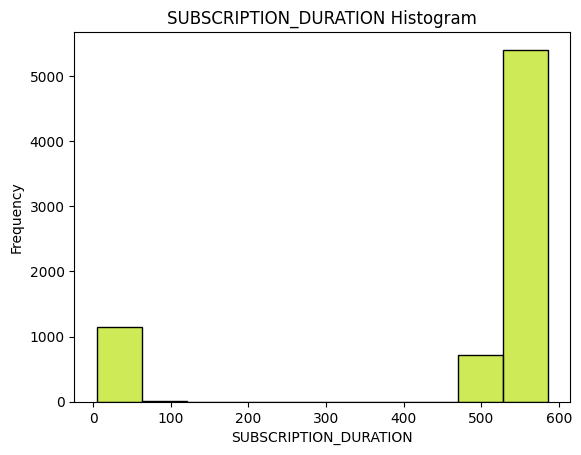

In [21]:
hist_graph(
    dataset=df,
    x='SUBSCRIPTION_DURATION',
    title='SUBSCRIPTION_DURATION Histogram',
    label_x='SUBSCRIPTION_DURATION',
    label_y='Frequency'
    )

⚠️ Important understand why some clinics stay less than 100 days.

### Cancelation

In [22]:
today = pd.Timestamp.today().normalize()
today

Timestamp('2025-03-10 00:00:00')

In [23]:
clinics_have_had_subscription = df.query('SUBSCRIPTION_START_DATE.notna()').groupby('CLINIC_ID').nunique().count().iloc[0]
print(f'Clinics that have or had a subscription: {clinics_have_had_subscription}.')

clinics_cancelled_subscription = df.query('SUBSCRIPTION_START_DATE.notna() & SUBSCRIPTION_END_DATE != @today').groupby('CLINIC_ID').nunique().count().iloc[0]
print(f'Clinics that cancelled their subscription: {clinics_cancelled_subscription}.')

churn_rate = (clinics_cancelled_subscription / clinics_have_had_subscription) * 100
print(f'Churn rate: {churn_rate:.2f}%')

Clinics that have or had a subscription: 330.
Clinics that cancelled their subscription: 39.
Churn rate: 11.82%


### Accreditation

In [24]:
ask_accreditation = df.query('HAS_ASKED_FOR_ACCREDITATION.notna()').groupby('CLINIC_ID').nunique().count().iloc[0]
print(f'Clinics that have asked for accreditation: {ask_accreditation}.')

ask_accreditation_approved = df.query('HAS_ASKED_FOR_ACCREDITATION.notna() & IS_ACCREDITATION_APPROVED == True').groupby('CLINIC_ID').nunique().count().iloc[0]
print(f'Clinics that have accreditation approved: {ask_accreditation_approved}.')

ask_accreditation_rejected = df.query('HAS_ASKED_FOR_ACCREDITATION.notna() & IS_ACCREDITATION_REPROVED == True').groupby('CLINIC_ID').nunique().count().iloc[0]
print(f'Clinics that have accreditation rejected: {ask_accreditation_rejected}.')

ask_accreditation_not_processed = df.query('HAS_ASKED_FOR_ACCREDITATION.notna() & IS_ACCREDITATION_REPROVED == False & IS_ACCREDITATION_APPROVED == False').groupby('CLINIC_ID').nunique().count().iloc[0]
print(f'Clinics that have accreditation not processed: {ask_accreditation_not_processed}.')

ask_accreditation_not_processed_rate = (ask_accreditation_not_processed / ask_accreditation) * 100
print(f'Accreditation not processed rate: {ask_accreditation_not_processed_rate:.2f}%')

Clinics that have asked for accreditation: 1922.
Clinics that have accreditation approved: 326.
Clinics that have accreditation rejected: 130.
Clinics that have accreditation not processed: 1466.
Accreditation not processed rate: 76.27%


⁉️ Why is the percentage of accreditation requests not processed so high?

⚠️ The accreditation process ends when there is a final status: approved or rejected.

In [25]:
df['ACCREDITATION_FINAL_ANALYSIS_AT'] = df[['ACCREDITATION_APPROVED_AT', 'ACCREDITATION_REJECTED_AT']].bfill(axis=1).iloc[:, 0]
df[['ACCREDITATION_APPROVED_AT', 'ACCREDITATION_REJECTED_AT', 'ACCREDITATION_FINAL_ANALYSIS_AT']].sample(5)


,ACCREDITATION_APPROVED_AT,ACCREDITATION_REJECTED_AT,ACCREDITATION_FINAL_ANALYSIS_AT
10187,NaT,NaT,NaT
5304,NaT,NaT,NaT
7945,NaT,NaT,NaT
5854,NaT,NaT,NaT
4220,NaT,NaT,NaT


In [26]:
# analysis time for accreditation
df['ACCREDITATION_FINAL_ANALYSIS_DURATION'] = (df.query('ACCREDITATION_FINAL_ANALYSIS_AT.notna()')['ACCREDITATION_FINAL_ANALYSIS_AT'] \
                                              - df.query('ACCREDITATION_FINAL_ANALYSIS_AT.notna()')['ACCREDITATION_REQUESTED_AT']).dt.days

df[['ACCREDITATION_REQUESTED_AT', 'ACCREDITATION_FINAL_ANALYSIS_AT', 'ACCREDITATION_FINAL_ANALYSIS_DURATION']].sample(5)

,ACCREDITATION_REQUESTED_AT,ACCREDITATION_FINAL_ANALYSIS_AT,ACCREDITATION_FINAL_ANALYSIS_DURATION
11494,NaT,NaT,NaN
2441,NaT,NaT,NaN
9567,NaT,NaT,NaN
11348,NaT,NaT,NaN
2146,NaT,NaT,NaN


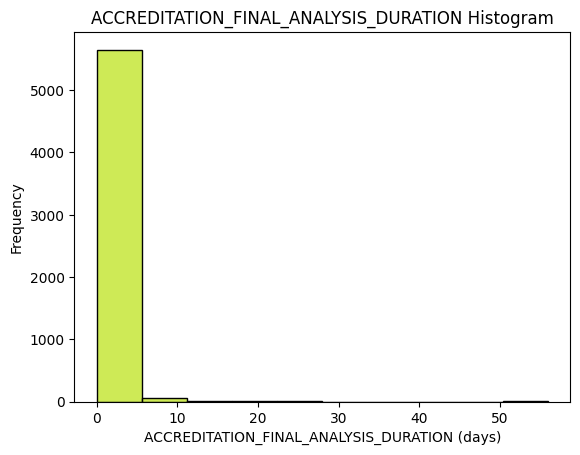

In [27]:
hist_graph(
    dataset=df,
    x='ACCREDITATION_FINAL_ANALYSIS_DURATION',
    title='ACCREDITATION_FINAL_ANALYSIS_DURATION Histogram',
    label_x='ACCREDITATION_FINAL_ANALYSIS_DURATION (days)',
    label_y='Frequency'
    )

In [28]:
df['ACCREDITATION_FINAL_ANALYSIS_DURATION'].describe()

,ACCREDITATION_FINAL_ANALYSIS_DURATION
count,5730.000000
mean,0.841710
std,1.998928
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,56.000000


💡 75% of accreditation requests analyzed are completed within 1 day.

## Funnel

In [29]:
stages = [
    "Total Clinics",
    "Clinics with Trial",
    "Clinics with Subscription After Trial",
    "Clinics with Active Subscription"
]

values = [
    total_clinics,
    total_clinics_with_trail,
    clinics_with_subscription_after_trail,
    clinics_with_subscription
]

fig = go.Figure(go.Funnel(
    y=stages,
    x=values,
    textinfo="value+percent initial",
    marker_color="#BEE41D"
))

fig.update_layout(title_text="Funnel of Clinics", title_x=0.5)
fig.show()

## Marketing

In [30]:
df['MARKETING_ATTRIBUITION'].unique()

array(['Paid - meta', 'Paid - google', 'Other', 'Site - pediu ajuda',
       'Organic - search', 'Indicação - interna', 'Organic - referral',
       'Organic - social'], dtype=object)

In [31]:
df['MARKETING_ATTRIBUITION_CHANNEL_GROUP'].unique()

array(['Paid - meta', 'Paid - google', 'Other', 'Other - known',
       'Organic'], dtype=object)

In [32]:
df['MARKETING_ATTRIBUITION_CAMPAIGN'].unique()

array(['meta_fce_bnpl', 'meta_signup_agenda', 'meta_signup_bnpl_Antiga',
       'google_search_saas_signup', nan, 'google_search_branding_signup',
       'meta_signup_bnpl', 'google_search_financiamento_signup',
       'google_search_bnpl_signup', 'meta_fce_saas_valor',
       'google_display_saas_signup', 'meta_signup_saas_set1',
       'meta_fce_saas_set1', 'google_discovery_saas_signup'], dtype=object)

In [33]:
df['MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT'].unique()

array(['BNPL', 'SaaS', nan, 'Branding'], dtype=object)

In [34]:
df['MARKETING_ATTRIBUITION_AD_GROUP'].unique()

array(['interesses-validados', nan, 'lal-all-1', 'base-fria-55k-1',
       'capim', 'kw-software-odontologico', 'kw-marca', 'termos-software',
       'conselhos-lal'], dtype=object)

In [35]:
df_mkt = df[['CLINIC_ID', 'CLINIC_CREATED_AT',
             'MARKETING_ATTRIBUITION', 'MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT', 'IS_PAID_MEDIUM',
             'REASON_1', 'REASON_2', 'REASON_3', 'REASON_4',
             'TRIAL_DURATION',
             'SUBSCRIPTION_DURATION', 'SUBSCRIPTION_STATUS',
             'HAS_ASKED_FOR_ACCREDITATION', 'IS_ACCREDITATION_APPROVED', 'IS_ACCREDITATION_REPROVED',
             ]] \
            .sort_values(by='CLINIC_CREATED_AT').drop_duplicates(subset=['CLINIC_ID'])

df_mkt.sample(5)

,CLINIC_ID,CLINIC_CREATED_AT,MARKETING_ATTRIBUITION,MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT,IS_PAID_MEDIUM,REASON_1,REASON_2,REASON_3,REASON_4,TRIAL_DURATION,SUBSCRIPTION_DURATION,SUBSCRIPTION_STATUS,HAS_ASKED_FOR_ACCREDITATION,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED
10659,10781,2023-09-18 08:51:24.465,Other,NaN,False,bnpl,calendar,NaN,NaN,7,NaN,NaN,False,False,False
1210,9201,2023-08-05 00:17:17.920,Paid - meta,SaaS,True,bnpl,NaN,NaN,NaN,7,NaN,NaN,False,False,False
9265,10507,2023-09-11 11:44:33.107,Organic - search,NaN,False,bnpl,NaN,NaN,NaN,7,519.0,active,True,True,False
7734,10327,2023-09-05 12:33:51.865,Paid - meta,BNPL,True,bnpl,NaN,NaN,NaN,7,NaN,NaN,False,False,False
13187,11274,2023-09-29 14:50:40.329,Paid - google,SaaS,True,finance_management,NaN,NaN,NaN,7,NaN,NaN,False,False,False


In [36]:
# boolean column
df_mkt['DID_TRIAL'] = df_mkt['TRIAL_DURATION'] != 0
df_mkt['DID_TRIAL'].sample(5)

,DID_TRIAL
11905,True
7527,True
1054,True
115,True
1308,True


In [37]:
# boolean column
df_mkt['DID_SUBSCRIPTION'] = df_mkt['SUBSCRIPTION_DURATION'].notna()
df_mkt[['SUBSCRIPTION_DURATION', 'DID_SUBSCRIPTION']].sample(5)

,SUBSCRIPTION_DURATION,DID_SUBSCRIPTION
10784,NaN,False
893,NaN,False
10967,NaN,False
7920,543.0,True
9207,NaN,False


In [38]:
df_mkt.shape

(1922, 17)

In [39]:
df_mkt.head()

,CLINIC_ID,CLINIC_CREATED_AT,MARKETING_ATTRIBUITION,MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT,IS_PAID_MEDIUM,REASON_1,REASON_2,REASON_3,REASON_4,TRIAL_DURATION,SUBSCRIPTION_DURATION,SUBSCRIPTION_STATUS,HAS_ASKED_FOR_ACCREDITATION,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,DID_TRIAL,DID_SUBSCRIPTION
0,8993,2023-08-01 06:25:16.121,Paid - meta,BNPL,True,bnpl,finance_management,patients_management,calendar,7,NaN,NaN,False,False,False,True,False
1,8994,2023-08-01 06:58:36.251,Paid - meta,SaaS,True,finance_management,patients_management,calendar,bnpl,7,NaN,NaN,False,False,False,True,False
7,8995,2023-08-01 06:59:23.156,Paid - meta,BNPL,True,bnpl,NaN,NaN,NaN,7,NaN,NaN,False,False,False,True,False
8,8996,2023-08-01 08:03:38.557,Paid - meta,SaaS,True,calendar,bnpl,patients_management,finance_management,7,NaN,NaN,False,False,False,True,False
9,8997,2023-08-01 08:34:33.894,Paid - meta,SaaS,True,patients_management,NaN,NaN,NaN,7,NaN,NaN,False,False,False,True,False


In [40]:
df_mkt.to_csv('/content/drive/MyDrive/test/capim/data/data_mkt_capim.csv', index=False)

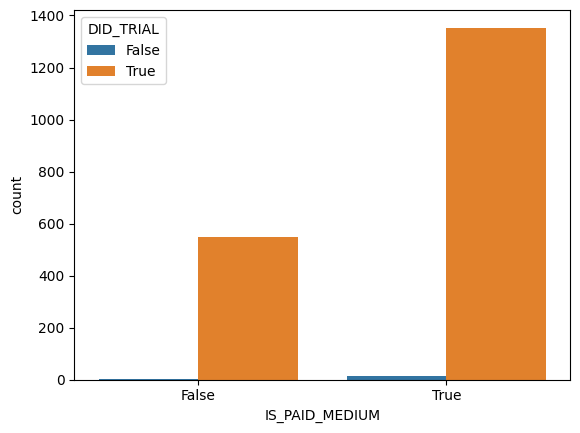

In [41]:
sns.countplot(df_mkt, x='IS_PAID_MEDIUM', hue='DID_TRIAL');

💡 Most of the clinics that opted for the trial came from paid media. Paid media attracted twice as many clinics as unpaid media.

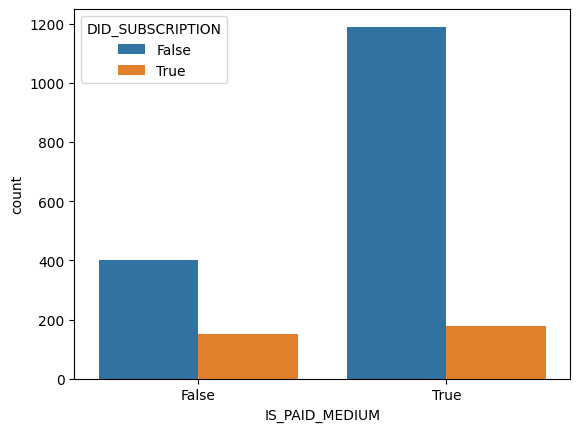

In [42]:
sns.countplot(df_mkt, x='IS_PAID_MEDIUM', hue='DID_SUBSCRIPTION');

💡 Looking at who subscribed, the difference between paid and unpaid media was not so different.

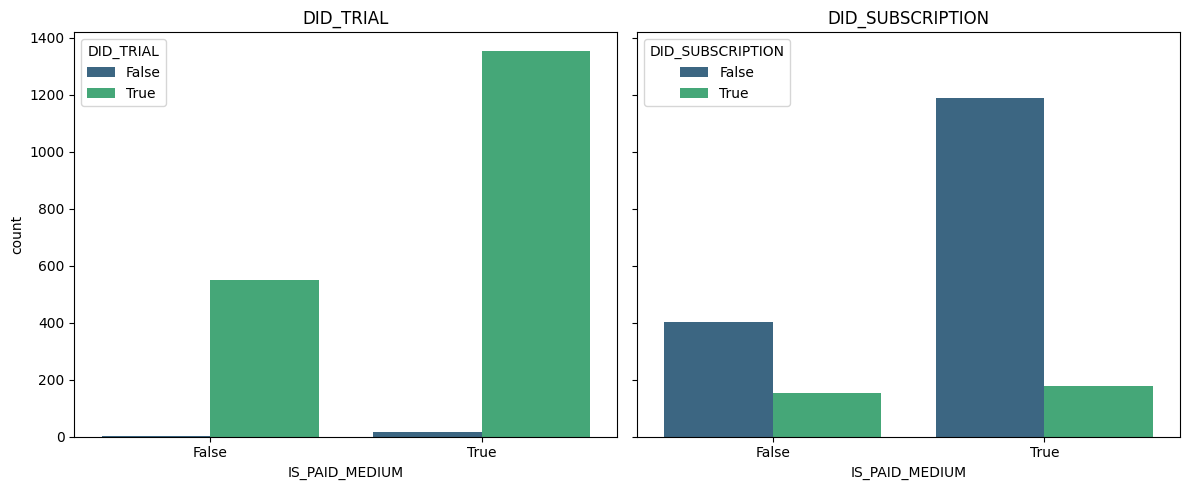

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# DID_TRIAL
sns.countplot(data=df_mkt, x='IS_PAID_MEDIUM', hue='DID_TRIAL', palette='viridis', ax=axes[0])
axes[0].set_title('DID_TRIAL')

# DID_SUBSCRIPTION
sns.countplot(data=df_mkt, x='IS_PAID_MEDIUM', hue='DID_SUBSCRIPTION', palette='viridis', ax=axes[1])
axes[1].set_title('DID_SUBSCRIPTION')

plt.tight_layout()
plt.show()




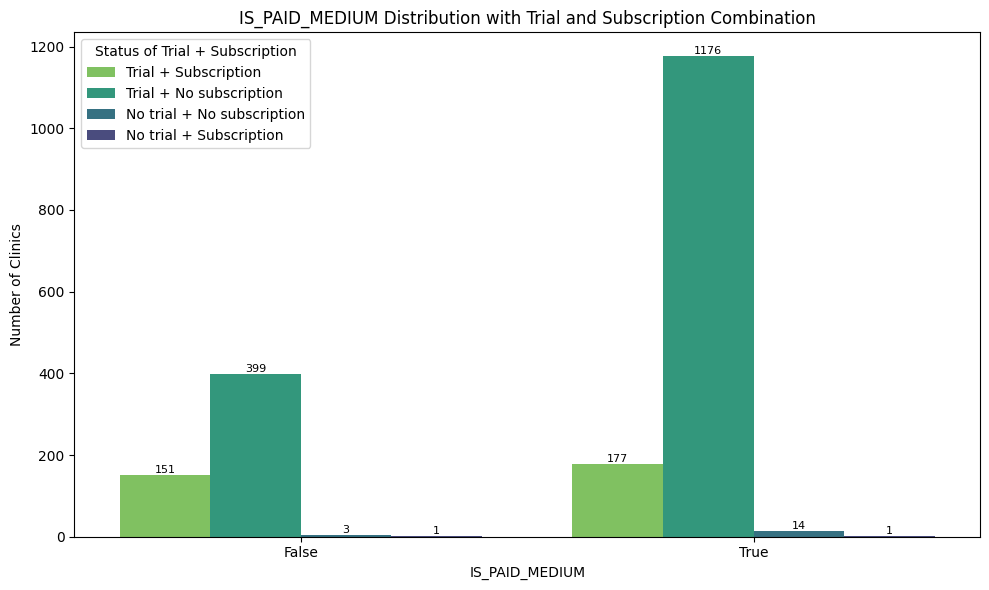

In [44]:
df_mkt_ = df_mkt.copy()

# combined column
df_mkt_['COMBINED_STATUS'] = df_mkt_.apply(lambda x: f"{'Trial' if x['DID_TRIAL'] else 'No trial'} + {'Subscription' if x['DID_SUBSCRIPTION'] else 'No subscription'}", axis=1)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_mkt_, x='IS_PAID_MEDIUM', hue='COMBINED_STATUS', palette='viridis_r')

# bar labels
for container in ax.containers:
    labels = [f'{int(height)}' if height > 0 else '' for height in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=8)

plt.title('IS_PAID_MEDIUM Distribution with Trial and Subscription Combination')
plt.xlabel('IS_PAID_MEDIUM')
plt.ylabel('Number of Clinics')
plt.legend(title='Status of Trial + Subscription')
plt.tight_layout()
plt.show()


## Reasons

In [45]:
df_long = pd.melt(df_mkt,
                  id_vars=['CLINIC_ID', 'DID_TRIAL', 'DID_SUBSCRIPTION'],
                  value_vars=['REASON_1', 'REASON_2', 'REASON_3', 'REASON_4'],
                  var_name='REASON_TYPE', value_name='REASON')

df_long.sample(5)

,CLINIC_ID,DID_TRIAL,DID_SUBSCRIPTION,REASON_TYPE,REASON
7124,10639,True,False,REASON_4,NaN
5754,11290,True,False,REASON_3,NaN
4644,9978,True,True,REASON_3,NaN
6181,9512,True,False,REASON_4,NaN
6245,9582,True,False,REASON_4,NaN


In [46]:
# remove NaN rows
df_long = df_long.dropna(subset=['REASON'])
df_long.sample(5)

,CLINIC_ID,DID_TRIAL,DID_SUBSCRIPTION,REASON_TYPE,REASON
139,9168,True,False,REASON_1,bnpl
1104,10351,True,False,REASON_1,finance_management
174,9211,True,False,REASON_1,bnpl
1053,10290,True,False,REASON_1,bnpl
608,9744,True,False,REASON_1,calendar


In [47]:
# creates a combined column with trial and subscription status
df_long['TRIAL_SUBSCRIPTION_STATUS'] = df_long.apply(
    lambda x: f"{'Trial' if x['DID_TRIAL'] else 'No trial'} + {'Subscription' if x['DID_SUBSCRIPTION'] else 'No subscription'}",
    axis=1
)

In [48]:
# distinct clinics by reason and status
df_counts = df_long.groupby(['REASON', 'TRIAL_SUBSCRIPTION_STATUS'])['CLINIC_ID'].nunique().reset_index(name='COUNT')
df_counts

,REASON,TRIAL_SUBSCRIPTION_STATUS,COUNT
0,bnpl,No trial + No subscription,10
1,bnpl,No trial + Subscription,1
2,bnpl,Trial + No subscription,1096
3,bnpl,Trial + Subscription,280
4,calendar,No trial + No subscription,6
5,calendar,Trial + No subscription,596
6,calendar,Trial + Subscription,132
7,finance_management,No trial + No subscription,6
8,finance_management,No trial + Subscription,1
9,finance_management,Trial + No subscription,665


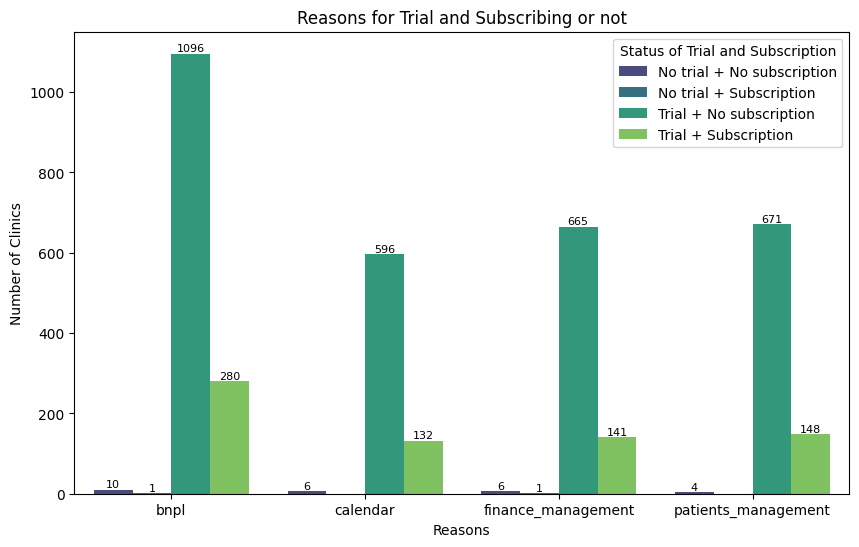

In [49]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=df_counts, x='REASON', y='COUNT', hue='TRIAL_SUBSCRIPTION_STATUS', palette='viridis', errorbar=None);

# labels
for container in ax.containers:
    labels = [f'{int(height)}' if height > 0 else '' for height in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=8)

# ax.yaxis.set_ticks([])
plt.title('Reasons for Trial and Subscribing or not')
plt.xlabel('Reasons')
plt.ylabel('Number of Clinics')
# plt.xticks(rotation=45)
plt.legend(title='Status of Trial and Subscription')
plt.show()
